# Model Validation and Selection

Creating a model

In [1]:
import pandas as pd
import datetime
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 4
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
weekend = ['Saturday','Sunday']
def week_day_type(x):
    if x in weekend:
        return 'weekends'
    else:
        return 'weekdays'
def time_slot(x):
    if x in morning:
        return 'morning'
    elif x in afternoon:
        return 'afternoon'
    elif x in evening:
        return 'evening'
    else:
        return 'night'  
df=pd.read_csv("../Part_2/energydata_complete.csv")
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.weekday_name
df['time_hr_24']=df['date'].dt.hour
df['time_min']=df['date'].dt.minute
df['week_day_type']=df['day_of_week'].map(week_day_type)
morning=range(6,12)
afternoon=range(12,17)
evening=range(17,22)  
df['time_slot']=df['time_hr_24'].map(time_slot)
df.drop(['date'],axis=1,inplace=True)
df=pd.get_dummies(df,prefix=['DOW','TS','WDT'],columns=['day_of_week','time_slot','week_day_type'])
print(df.shape)
df=df[(df['Appliances']-df['Appliances'].mean()).abs() <= 3*df['Appliances'].std()]
df=df[(df['lights']-df['lights'].mean()).abs() <= 3*df['lights'].std()]
df=df[(df['T1']-df['T1'].mean()).abs() <= 3*df['T1'].std()]
df=df[(df['T2']-df['T2'].mean()).abs() <= 3*df['T2'].std()]
df=df[(df['T3']-df['T3'].mean()).abs() <= 3*df['T3'].std()]
df=df[(df['T4']-df['T4'].mean()).abs() <= 3*df['T4'].std()]
df=df[(df['T5']-df['T5'].mean()).abs() <= 3*df['T5'].std()]
df=df[(df['T6']-df['T6'].mean()).abs() <= 3*df['T6'].std()]
df=df[(df['T7']-df['T7'].mean()).abs() <= 3*df['T7'].std()]
df=df[(df['T8']-df['T8'].mean()).abs() <= 3*df['T8'].std()]
df=df[(df['T9']-df['T9'].mean()).abs() <= 3*df['T9'].std()]
df=df[(df['T_out']-df['T_out'].mean()).abs() <= 3*df['T_out'].std()]
df=df[(df['RH_1']-df['RH_1'].mean()).abs() <= 3*df['RH_1'].std()]
df=df[(df['RH_2']-df['RH_2'].mean()).abs() <= 3*df['RH_2'].std()]
df=df[(df['RH_3']-df['RH_3'].mean()).abs() <= 3*df['RH_3'].std()]
df=df[(df['RH_4']-df['RH_4'].mean()).abs() <= 3*df['RH_4'].std()]
df=df[(df['RH_5']-df['RH_5'].mean()).abs() <= 3*df['RH_5'].std()]
df=df[(df['RH_6']-df['RH_6'].mean()).abs() <= 3*df['RH_6'].std()]
df=df[(df['RH_7']-df['RH_7'].mean()).abs() <= 3*df['RH_7'].std()]
df=df[(df['RH_8']-df['RH_8'].mean()).abs() <= 3*df['RH_8'].std()]
df=df[(df['RH_9']-df['RH_9'].mean()).abs() <= 3*df['RH_9'].std()]
df=df[(df['RH_out']-df['RH_out'].mean()).abs() <= 3*df['RH_out'].std()]
df=df[(df['Press_mm_hg']-df['Press_mm_hg'].mean()).abs() <= 3*df['Press_mm_hg'].std()]
df=df[(df['Windspeed']-df['Windspeed'].mean()).abs() <= 3*df['Windspeed'].std()]
df=df[(df['Visibility']-df['Visibility'].mean()).abs() <= 3*df['Visibility'].std()]
df=df[(df['Tdewpoint']-df['Tdewpoint'].mean()).abs() <= 3*df['Tdewpoint'].std()]
df=df[(df['rv1']-df['rv1'].mean()).abs() <= 3*df['rv1'].std()]
df=df[(df['rv2']-df['rv2'].mean()).abs() <= 3*df['rv2'].std()]
print(df.shape)
energy = df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


(19735, 46)
(17118, 46)


Now the model is ready, let's find ut how the data is distributed.

In [2]:
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday,TS_afternoon,TS_evening,TS_morning,TS_night,WDT_weekdays,WDT_weekends
27,100,20,21.356667,45.826667,20.666667,45.163333,20.390000,46.090000,19.390000,47.500000,...,0,0,0,0,0,1,0,0,1,0
28,100,20,21.390000,45.690000,20.700000,45.060000,20.390000,46.090000,19.426667,47.993333,...,0,0,0,0,0,1,0,0,1,0
29,100,20,21.500000,45.333333,20.700000,44.933333,20.390000,46.060000,19.566667,48.466667,...,0,0,0,0,0,1,0,0,1,0
30,110,20,21.500000,45.126667,20.790000,44.633333,20.390000,46.000000,19.666667,48.093333,...,0,0,0,0,0,0,0,1,1,0
31,400,20,21.533333,44.966667,20.790000,44.360000,20.426667,45.933333,19.600000,47.500000,...,0,0,0,0,0,0,0,1,1,0


Now when we now how the initial data is distributed, let's find out whethere it has any null values. Also, we have to find what are the nature of the data in our dataset. 

In [3]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17118 entries, 27 to 19697
Data columns (total 46 columns):
Appliances       17118 non-null int64
lights           17118 non-null int64
T1               17118 non-null float64
RH_1             17118 non-null float64
T2               17118 non-null float64
RH_2             17118 non-null float64
T3               17118 non-null float64
RH_3             17118 non-null float64
T4               17118 non-null float64
RH_4             17118 non-null float64
T5               17118 non-null float64
RH_5             17118 non-null float64
T6               17118 non-null float64
RH_6             17118 non-null float64
T7               17118 non-null float64
RH_7             17118 non-null float64
T8               17118 non-null float64
RH_8             17118 non-null float64
T9               17118 non-null float64
RH_9             17118 non-null float64
T_out            17118 non-null float64
Press_mm_hg      17118 non-null float64
RH_out        

Detecting overfitting.

In [4]:
# Overfitting detecting
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

Making the model to help us better analyze the data better.

In [5]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)
x_train=df_train.iloc[:,1:]
y_train=df_train['Appliances']
scaler.fit(x_train)
X_train=scaler.transform(x_train)
x_test=df_test.iloc[:,1:]
y_test=df_test['Appliances']
X_test=scaler.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Regularization

In [6]:
# Set random_state as a const to make sure the same split will be generated every time you run the code.
#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

# Containers for note down the MSE
train_mse_list = []
test_mse_list = []
degree_of_polynomial = []


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053818724
RMSE : 66.97022394230406
MAPE : 59.438714429055615

For Testing Data : 
R2   : -0.0006374735902034967
MAE  : 41.2046509535851
RMSE : 64.5491115646738
MAPE : 59.736543365791405

Degree :  1
For Training Data : 
R2   : 0.24619548481936826
MAE  : 34.80392849676698
RMSE : 58.144831784060095
MAPE : 45.72277398020789

For Testing Data : 
R2   : 0.2298578580517695
MAE  : 34.36635009974182
RMSE : 56.62879649426638
MAPE : 46.72952860193265

Degree :  2
For Training Data : 
R2   : 0.48024125999912826
MAE  : 29.435697410047364
RMSE : 48.28171094331926
MAPE : 38.73221549272961

For Testing Data : 
R2   : 0.38909915284424024
MAE  : 31.031890013507592
RMSE : 50.435606919659385
MAPE : 41.60194677164027

Degree :  3
For Training Data : 
R2   : 0.9759986302656859
MAE  : 7.650406059528747
RMSE : 10.375278538453722
MAPE : 13.264566632340562

For Testing Data : 
R2   : -19.05326648593252
MAE  : 125.02463821458667
RMSE : 288.9644722529457

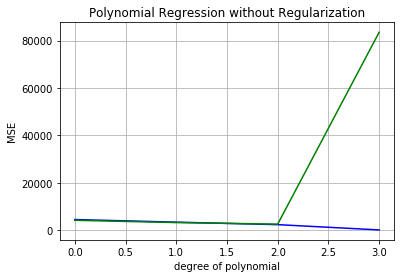

In [7]:
# MSE of quartic expression will be very large compared with the lower degree, so let's just end at 3.
for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    # Transfer the X to a polynomial form by using fit_transform
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    lm = linear_model.LinearRegression()
    lm.fit(X_train_, y_train)
    train_pred = lm.predict(X_train_)
    train_mse_list.append(mean_squared_error(y_train, train_pred))
    test_pred = lm.predict(X_test_)
    test_mse_list.append(mean_squared_error(y_test, test_pred))
    degree_of_polynomial.append(i)
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred))
    print("MAE  :",mean_absolute_error(y_train,train_pred))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_pred))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred))
    print("MAE  :",mean_absolute_error(y_test,test_pred))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_pred))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Regularization')
plt.plot(degree_of_polynomial, train_mse_list, '-b', degree_of_polynomial, test_mse_list, '-g')
plt.show()

Performing L1 (lasso)


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053818724
RMSE : 66.97022394230406
MAPE : 59.438714429055615

For Testing Data : 
R2   : -0.0006374735902034967
MAE  : 41.2046509535851
RMSE : 64.5491115646738
MAPE : 59.736543365791405


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  1
For Training Data : 
R2   : 0.2466775034423484
MAE  : 34.818098659291024
RMSE : 58.12623851945904
MAPE : 45.82241820328964

For Testing Data : 
R2   : 0.2299911110173104
MAE  : 34.40618584262798
RMSE : 56.623897215878245
MAPE : 46.86547939504433

Degree :  2
For Training Data : 
R2   : 0.4674986388083078
MAE  : 29.740709001773165
RMSE : 48.86997448827269
MAPE : 39.020585416537116

For Testing Data : 
R2   : 0.3841091623698538
MAE  : 30.954250279911506
RMSE : 50.64117330184368
MAPE : 41.278186123302795

Degree :  3
For Training Data : 
R2   : 0.8254063318717283
MAE  : 17.55675699138289
RMSE : 27.983111044570666
MAPE : 25.07165094011222

For Testing Data : 
R2   : 0.17950646370851475
MAE  : 35.4360727229838
RMSE : 58.45066676560852
MAPE : 48.32550247897727


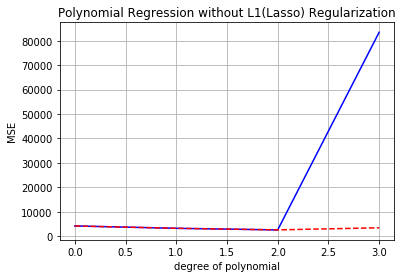

In [8]:
from sklearn.linear_model import Lasso

# Randomly pick a alpha value for regularization
l1reg = Lasso(alpha=0.000003, normalize=True)

l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    l1reg.fit(X_train_, y_train)
    train_pred_l1 = l1reg.predict(X_train_)
    test_pred_l1 = l1reg.predict(X_test_)
    l1reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l1))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_l1))
    print("MAE  :",mean_absolute_error(y_train,train_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_l1)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_pred_l1))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_l1))
    print("MAE  :",mean_absolute_error(y_test,test_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_l1)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_pred_l1))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l1reg_test_mse_list, '--r')
plt.show()

Performing L2 (Ridge)


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053818724
RMSE : 66.97022394230406
MAPE : 59.438714429055615

For Testing Data : 
R2   : -0.0006374735902034967
MAE  : 41.2046509535851
RMSE : 64.5491115646738
MAPE : 59.736543365791405

Degree :  1
For Training Data : 
R2   : 0.24667753674601323
MAE  : 34.817539037137415
RMSE : 58.1262372346064
MAPE : 45.82119598498217

For Testing Data : 
R2   : 0.2299872304602084
MAE  : 34.40595455409023
RMSE : 56.62403989734127
MAPE : 46.8650037449777

Degree :  2
For Training Data : 
R2   : 0.4792382229106992
MAE  : 29.390096776916774
RMSE : 48.32827582154996
MAPE : 38.610016305000386

For Testing Data : 
R2   : 0.3907766433406593
MAE  : 30.876464924609994
RMSE : 50.366313014134285
MAPE : 41.283023492698156

Degree :  3
For Training Data : 
R2   : 0.9094967178290296
MAE  : 12.962958718243502
RMSE : 20.14716373486387
MAPE : 19.4335036254538

For Testing Data : 
R2   : -0.3952451778813524
MAE  : 42.591280660717544
RMSE : 76.22144059275448
MA

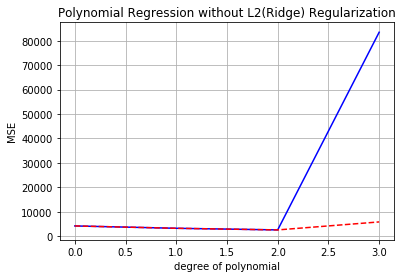

In [9]:
from sklearn.linear_model import Ridge

l2reg = Ridge(alpha=0.00003, normalize=True)

l2reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    l2reg.fit(X_train_, y_train)
    train_pred_l2 = l2reg.predict(X_train_)
    test_pred_l2 = l2reg.predict(X_test_)
    l2reg_test_mse_list.append(mean_squared_error(y_test, test_pred_l2))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_l2))
    print("MAE  :",mean_absolute_error(y_train,train_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_l2)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_pred_l2))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_l2))
    print("MAE  :",mean_absolute_error(y_test,test_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_l2)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_pred_l2))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, l2reg_test_mse_list, '--r')
plt.show()

# Red dash line is the testing error after L2 regularization

Performing ElasticNet


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053818724
RMSE : 66.97022394230406
MAPE : 59.438714429055615

For Testing Data : 
R2   : -0.0006374735902034967
MAE  : 41.2046509535851
RMSE : 64.5491115646738
MAPE : 59.736543365791405

Degree :  1
For Training Data : 
R2   : 0.21159962829877954
MAE  : 34.37472141991436
RMSE : 59.464142612243826
MAPE : 44.91581383180861

For Testing Data : 
R2   : 0.20463218118338689
MAE  : 33.69147640382885
RMSE : 57.548750038515834
MAPE : 45.498776210360035


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  2
For Training Data : 
R2   : 0.36741170777381305
MAE  : 31.027699357961275
RMSE : 53.26504841459803
MAPE : 39.8030536222072

For Testing Data : 
R2   : 0.32472727355219333
MAE  : 31.235391498436357
RMSE : 53.02632048293679
MAPE : 41.08460223827133

Degree :  3
For Training Data : 
R2   : 0.6041777714071427
MAE  : 24.18121642499791
RMSE : 42.13391754484241
MAPE : 31.024321035045954

For Testing Data : 
R2   : 0.4108482269016993
MAE  : 29.034959755231156
RMSE : 49.52967544141981
MAPE : 37.64312680058393


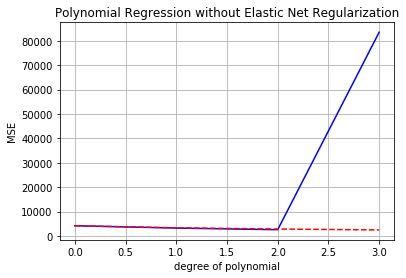

In [10]:
from sklearn.linear_model import ElasticNet

enreg = ElasticNet(alpha=0.00003, normalize=True)

enreg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    
    enreg.fit(X_train_, y_train)
    train_pred_en = enreg.predict(X_train_)
    test_pred_en = enreg.predict(X_test_)
    enreg_test_mse_list.append(mean_squared_error(y_test, test_pred_en))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_pred_en))
    print("MAE  :",mean_absolute_error(y_train,train_pred_en))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_pred_en)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_pred_en))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_pred_en))
    print("MAE  :",mean_absolute_error(y_test,test_pred_en))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_pred_en)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_pred_en))

plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.grid(True)
plt.title('Polynomial Regression without Elastic Net Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial, enreg_test_mse_list, '--r')
plt.show()
# Red dash line is the testing error after Elastic Net regularization

trying to find the best value for alpha.

The generalization score of linear regression model is 0.240964
The generalization score of quadratic regression model is 0.379619


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

The calculated optimal alpha is 0.000050 
The max generalization score of L1 regularized polynomial regression model is 0.377953 +- 0.000245


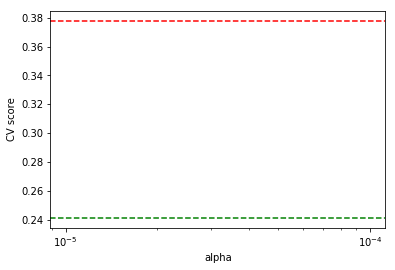

In [11]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, X_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)

pm_score = np.mean(model_selection.cross_val_score(lm, X_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
l1reg = Lasso(normalize=True)
for alpha in alphas:
    l1reg.alpha = alpha
    this_scores = model_selection.cross_val_score(l1reg, X_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(X_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of L1 regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()

# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.

Using the derived alpha to perfrom regularization. 


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053818724
RMSE : 66.97022394230406
MAPE : 59.438714429055615

For Testing Data : 
R2   : -0.0006374735902034967
MAE  : 41.2046509535851
RMSE : 64.5491115646738
MAPE : 59.736543365791405

Degree :  1
For Training Data : 
R2   : 0.24667369524767202
MAE  : 34.80689378852208
RMSE : 58.126385439107224
MAPE : 45.80343971575928

For Testing Data : 
R2   : 0.230059025337902
MAE  : 34.39408953475732
RMSE : 56.621400063987046
MAPE : 46.84566047176926


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  2
For Training Data : 
R2   : 0.4672018836429198
MAE  : 29.594710540698898
RMSE : 48.883589850115364
MAPE : 38.69891858291855

For Testing Data : 
R2   : 0.38632157827973745
MAE  : 30.741592041241322
RMSE : 50.550134330897365
MAPE : 40.89884943024219

Degree :  3
For Training Data : 
R2   : 0.8060843217613135
MAE  : 17.94516181149991
RMSE : 29.490912661174292
MAPE : 25.037778909560526

For Testing Data : 
R2   : 0.29414362201061506
MAE  : 32.84604262100623
RMSE : 54.21382620971344
MAPE : 44.55712800815658
MSE of linear regression model is 3206.820592
MSE of quadratic regression model is 2543.750445
MSE of optimal L1 regularized quadratic regression model is 2555.316081


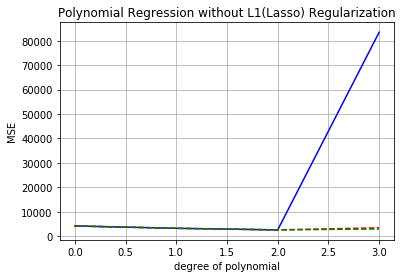

In [12]:
# Set the alpha as the optimal value we got from the last step

optimal_l1reg = Lasso(alpha=0.000050, normalize=True)

opt_l1reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    optimal_l1reg.fit(X_train_, y_train)
    train_opt_pred_l1 = optimal_l1reg.predict(X_train_)
    test_opt_pred_l1 = optimal_l1reg.predict(X_test_)
    opt_l1reg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_l1))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_l1))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_l1)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_opt_pred_l1))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_l1))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_l1))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_l1)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_opt_pred_l1))

print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L1 regularized quadratic regression model is %f' % opt_l1reg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L1(Lasso) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  l1reg_test_mse_list, '--r',
         degree_of_polynomial, opt_l1reg_test_mse_list, '--g')
plt.show()

# Green dash line is the testing error after L1 regularization with optimal alpha. We can see that it is lower
# than the red dash line which using alpha=0.005.

The generalization score of linear regression model is 0.240964
The generalization score of quadratic regression model is 0.379619
The calculated optimal alpha is 0.000050 
The max generalization score of L2 regularized polynomial regression model is 0.381709 +- 0.000265


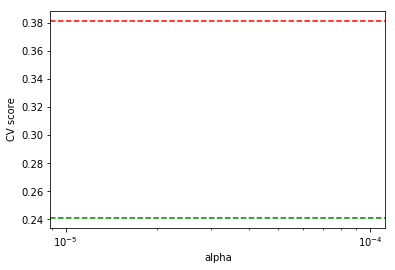

In [19]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, X_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)

pm_score = np.mean(model_selection.cross_val_score(lm, X_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
l2reg = Ridge(normalize=True)
for alpha in alphas:
    l2reg.alpha = alpha
    this_scores = model_selection.cross_val_score(l2reg, X_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(X_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of L2 regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()

# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053818724
RMSE : 66.97022394230406
MAPE : 59.438714429055615

For Testing Data : 
R2   : -0.0006374735902034967
MAE  : 41.2046509535851
RMSE : 64.5491115646738
MAPE : 59.736543365791405

Degree :  1
For Training Data : 
R2   : 0.24667746223099996
MAE  : 34.81677094898411
RMSE : 58.12624010938941
MAPE : 45.81986812353821

For Testing Data : 
R2   : 0.22999536080825556
MAE  : 34.405082750334905
RMSE : 56.62374095790438
MAPE : 46.8634899154764

Degree :  2
For Training Data : 
R2   : 0.4787140970559245
MAE  : 29.380169704676053
RMSE : 48.35258994151983
MAPE : 38.570643988156874

For Testing Data : 
R2   : 0.3910449410923299
MAE  : 30.83299749290556
RMSE : 50.355221304912966
MAPE : 41.19152455809342

Degree :  3
For Training Data : 
R2   : 0.9000059787718147
MAE  : 13.506346470214703
RMSE : 21.17721120996598
MAPE : 20.027074299417144

For Testing Data : 
R2   : -0.22393028340813137
MAE  : 40.482104077079455
RMSE : 71.38882401298025

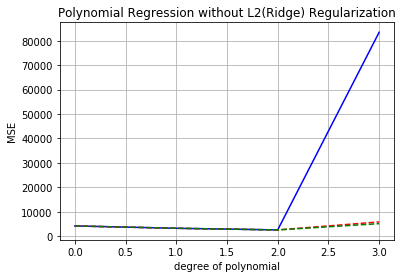

In [13]:
# Set the alpha as the optimal value we got from the last step

optimal_l2reg = Ridge(alpha=0.000050, normalize=True)

opt_l2reg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    optimal_l2reg.fit(X_train_, y_train)
    train_opt_pred_l2 = optimal_l2reg.predict(X_train_)
    test_opt_pred_l2 = optimal_l2reg.predict(X_test_)
    opt_l2reg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_l2))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_l2))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_l2)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_opt_pred_l2))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_l2))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_l2))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_l2)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_opt_pred_l2))

print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L2 regularized quadratic regression model is %f' % opt_l2reg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  l2reg_test_mse_list, '--r',
         degree_of_polynomial, opt_l2reg_test_mse_list, '--g')
plt.show()

The generalization score of linear regression model is 0.240964
The generalization score of quadratic regression model is 0.379619


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

The calculated optimal alpha is 0.000050 
The max generalization score of ElasticNet regularized polynomial regression model is 0.317952 +- 0.000142


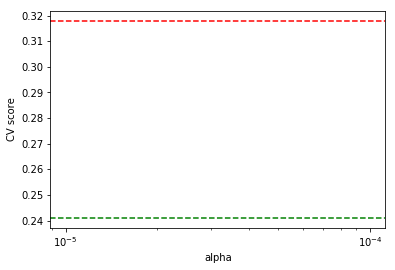

In [20]:
from sklearn import model_selection

# Use cross_val_score to measure the generalization performance of the model. We want to get the optimal alpha
# which maximums the cross_val_score
# Set the fold to 5 by "cv=5" since we does not want a high computation
lm_score = np.mean(model_selection.cross_val_score(lm, X_train, y_train, n_jobs=1, cv=6))
print ('The generalization score of linear regression model is %f' % np.mean(lm_score))

# Since alpha=0.005 is not that good, we set it as a lower bound to find a better value. You can also set it as a
# higher bound which does not matter.
alphas = np.arange(5e-5, 1e-4, 5e-5)

scores = []
scores_std = []

# Let's just set the degree of polynomial as 2 to simplify the calculation

model = PolynomialFeatures(degree=2)
X_train_ = model.fit_transform(X_train)

pm_score = np.mean(model_selection.cross_val_score(lm, X_train_, y_train, n_jobs=1, cv=6))
print ( 'The generalization score of quadratic regression model is %f' % np.mean(pm_score))

# 5-fold CV will train the same alpha 5 times on 5 different train sets and return 5 different models.
# Then it will test these 5 models on corresponding test sets to get the cross validation scores.
# Average the scores as the final score of the given alpha.
enreg = ElasticNet(normalize=True)
for alpha in alphas:
    enreg.alpha = alpha
    this_scores = model_selection.cross_val_score(enreg, X_train_, y_train, n_jobs=1, cv=6)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

max_score = np.max(scores)
max_score_pos = scores.index(max_score)
optimal_alpha = alphas[max_score_pos]
std_err = np.array(scores_std) / np.sqrt(len(X_train_))
print ( 'The calculated optimal alpha is %f ' % optimal_alpha )
print ('The max generalization score of ElasticNet regularized polynomial regression model is %f +- %f' \
      % (max_score, std_err[max_score_pos]))

plt.semilogx(alphas, np.array(scores), '-b')
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + std_err, '--b')
plt.semilogx(alphas, np.array(scores) - std_err, '--b')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='r')
plt.axhline(lm_score, linestyle='--', color='g')
plt.show()
# Blue solid line is the cv scores with alpha increasing.
# Blue dash line is the standard deviation of cv scores.
# Red dash line is the max value of cv scores.
# Green dash line is a bonus. It is the cv score of linear model. What we expect is that the cv score after
# regularization with optimal alpha will be higher than original quadratic model. The truth is that it is even
# higher than the linear model's. Even we look at the lower blue dash line.


Degree :  0
For Training Data : 
R2   : 0.0
MAE  : 42.3214053818724
RMSE : 66.97022394230406
MAPE : 59.438714429055615

For Testing Data : 
R2   : -0.0006374735902034967
MAE  : 41.2046509535851
RMSE : 64.5491115646738
MAPE : 59.736543365791405

Degree :  1
For Training Data : 
R2   : 0.2008056339139337
MAE  : 34.37562696301591
RMSE : 59.86982076993888
MAPE : 44.97798196278254

For Testing Data : 
R2   : 0.19491500806001205
MAE  : 33.63690250874567
RMSE : 57.899225321051844
MAPE : 45.47545069399212


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Degree :  2
For Training Data : 
R2   : 0.34840160949689913
MAE  : 31.377783331347104
RMSE : 54.05946615065871
MAPE : 40.25982707668066

For Testing Data : 
R2   : 0.31067977109311695
MAE  : 31.44356313995163
RMSE : 53.57502709959463
MAPE : 41.389428788612676

Degree :  3
For Training Data : 
R2   : 0.5757245792187303
MAE  : 24.97411933378405
RMSE : 43.6220114693808
MAPE : 31.8868944609839

For Testing Data : 
R2   : 0.4046130164035331
MAE  : 29.07541337678263
RMSE : 49.791081034864625
MAPE : 37.636815171374174
MSE of linear regression model is 3206.820592
MSE of quadratic regression model is 2543.750445
MSE of optimal L2 regularized quadratic regression model is 2870.283529


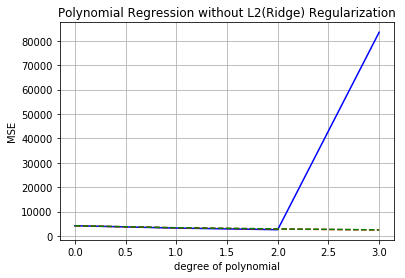

In [14]:
optimal_enreg = ElasticNet(alpha=0.000050, normalize=True)

opt_enreg_test_mse_list = []

for i in range(0, 4):
    model = PolynomialFeatures(degree=i)
    X_train_ = model.fit_transform(X_train)
    X_test_ = model.fit_transform(X_test)
    optimal_enreg.fit(X_train_, y_train)
    train_opt_pred_enreg = optimal_enreg.predict(X_train_)
    test_opt_pred_enreg = optimal_enreg.predict(X_test_)
    opt_enreg_test_mse_list.append(mean_squared_error(y_test, test_opt_pred_enreg))
    print("\nDegree : ",i)
    print("For Training Data : ")
    print("R2   :",r2_score(y_train,train_opt_pred_enreg))
    print("MAE  :",mean_absolute_error(y_train,train_opt_pred_enreg))
    print("RMSE :",np.sqrt(mean_squared_error(y_train,train_opt_pred_enreg)))
    print("MAPE :",mean_absolute_percentage_error(y_train,train_opt_pred_enreg))
    print("\nFor Testing Data : ")
    print("R2   :",r2_score(y_test,test_opt_pred_enreg))
    print("MAE  :",mean_absolute_error(y_test,test_opt_pred_enreg))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,test_opt_pred_enreg)))
    print("MAPE :",mean_absolute_percentage_error(y_test,test_opt_pred_enreg))

print ('MSE of linear regression model is %f' % test_mse_list[1])
print ('MSE of quadratic regression model is %f' % test_mse_list[2])
print ('MSE of optimal L2 regularized quadratic regression model is %f' % opt_enreg_test_mse_list[2])


plt.xlabel('degree of polynomial')
plt.ylabel('MSE')

plt.grid(True)
plt.title('Polynomial Regression without L2(Ridge) Regularization')
plt.plot(degree_of_polynomial, test_mse_list, '-b', degree_of_polynomial,  enreg_test_mse_list, '--r',
         degree_of_polynomial, opt_enreg_test_mse_list, '--g')
plt.show()

# Cross Validation Technique

Testing for training dataset.

In [15]:
#df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)
#x_train=df_train.iloc[:,1:]
#y_train=df_train['Appliances']
#scaler.fit(x_train)
#X_train=scaler.transform(x_train)
#x_test=df_test.iloc[:,1:]
#y_test=df_test['Appliances']
#X_test=scaler.transform(x_test)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracy_train = cross_val_score(estimator = LinearRegression() , X = X_train, y = y_train , cv = 10)

accuracy_train

array([0.23939319, 0.20994031, 0.28080389, 0.24029031, 0.24235254,
       0.21612244, 0.23405993, 0.24911729, 0.24016138, 0.26527946])

Mean accuracy.

In [16]:
accuracy_train.mean()

0.24175207193743198

Performing on testing dataset.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracy_test = cross_val_score(estimator = LinearRegression() , X = X_test, y = y_test , cv = 10)

accuracy_test

array([0.15211076, 0.20928208, 0.25724492, 0.20743369, 0.26784327,
       0.25292395, 0.28916533, 0.22152727, 0.18031048, 0.22997972])

Mean accuracy.

In [18]:
accuracy_test.mean()

0.2267821480096499